Consider National Highway Authority of India (NHAI) provides you a real accidental data set of Bangalore highway of India. The size of data set is (83 x 8). Apply suitable Machine Learning technique to address following problems.
1. Forecast Accident type(variable C in the data set) for year 2015 based on the observations given for year 2014 in the data set. Analyse the predictive results achieved.

[Hint:-

* LHS stands for Left-hand sight
* RHS stands for Right-hand side
* Ch. stands for Chainage which is an imaginary line used to measure distance, often corresponding to the centre of a straight road.
* KM/km/KMS is kilometres
* ROW - Right of Way - the legal right, established by usage or grant, to pass along a specific route through grounds or property belonging to another, for example, to remove obstructions to make roads
* MCW means the main carriageway

Also, 103+123 km means 103 km and 123 metres, or 103.123 metres.
Please note for solving & understanding convenience, either convert "+" values into "." format . Check that the entire column values in the same format ]

2. Use feature Location in the data set to identify the prone area of major accidents.
3. Identify top 5 important features for variable Accident type(variable C in the data set)

## Content

* [1. Loading Data And Overview](#data_loading)
* [2. Data Preprocessing](#data_preprocessing)
* [2.1. Accident Date Time](#acc_datetime)
* [2.2 Accident Location](#acc_location)
* [2.3 Accident Causes](#acc_causes)
* [2.4 Help Provided By Ambulance Patrol](#acc_help)
* [2.5 Classification of Accident](#acc_classification)
* [2.6 Rearanging Columns](#col_rearange)
* [3. Feature Selection And Splitting](#featue_selection)
* [4. Finding Important Features](#important_feature)
* [5. Selecting And Applying Model](#model_selection)
* [6. Model Evaluation And Performance Tuning](#model_evaluation)
* [6.1 Cross Validation for SVM](#accuracy_svm)
* [6.1 Cross Validation for KNN](#accuracy_knn)
* [7. Applying Final Model](#final_model)

In [40]:
## Load all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
sns.set_style('darkgrid')

<a id='data_loading'></a>
## 1. Loading Data And Overview

In [3]:
## Load the data
accident_data = pd.read_csv('NHAIAccidentData.csv')
accident_data.head()

,Date,TimeOfAcc,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,VehicleResponsible,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Remarks
0,9/6/2015,09:00 AM,Ch. 69+5006,2,2,2,2,1,9,1,One Diesel Truck collapsed,0,2,1,0,0,Petrol Vehicle,NaN
1,9/5/2014,07:18 AM,72+500,7,1,2,2,3,9,1,Lorry & Scorpio,2,0,0,0,0,Ambulance,NaN
2,9/10/2014,08:50 AM,20+250 LHS,4,-,3,3,1,9,1,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),0,0,0,0,0,Petrol Vehicle,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.
3,8/9/2015,05:00 AM,NaN,1,2,2,1,3,9,1,Lorry Truck,0,1,1,0,0,Petrol Vehicle,NaN
4,8/4/2015,08:23 AM,126.800 KM RHS,2,2,2,4,4,9,1,Car,0,2,1,1,0,Petrol Vehicle,A car upside due to over speed


In [4]:
accident_data.shape

(91, 18)

In this dataset 91 accident records present.Some Missing data are present in the set. We need to process those data before applying a learning algorithm.

## 2. Data Preprocessing

<a id='acc_datetime'></a>
### 2.1 Accident Date Time

In [5]:
# Concatenating date and time column
accident_data['Acc_datetime'] = accident_data['Date'].values + ' ' +  accident_data['TimeOfAcc'].values
cols = accident_data.columns.to_list()
cols = cols[-1:] + cols[:-1]
accident_data = accident_data[cols]
## Drop the Date and TimeOfAcc columns
accident_data.drop(['Date', 'TimeOfAcc'], axis=1, inplace=True)
accident_data.head()

,Acc_datetime,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,VehicleResponsible,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Remarks
0,9/6/2015 09:00 AM,Ch. 69+5006,2,2,2,2,1,9,1,One Diesel Truck collapsed,0,2,1,0,0,Petrol Vehicle,NaN
1,9/5/2014 07:18 AM,72+500,7,1,2,2,3,9,1,Lorry & Scorpio,2,0,0,0,0,Ambulance,NaN
2,9/10/2014 08:50 AM,20+250 LHS,4,-,3,3,1,9,1,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),0,0,0,0,0,Petrol Vehicle,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.
3,8/9/2015 05:00 AM,NaN,1,2,2,1,3,9,1,Lorry Truck,0,1,1,0,0,Petrol Vehicle,NaN
4,8/4/2015 08:23 AM,126.800 KM RHS,2,2,2,4,4,9,1,Car,0,2,1,1,0,Petrol Vehicle,A car upside due to over speed


(array([40.,  0., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([2014. , 2014.4, 2014.8, 2015.2, 2015.6, 2016. , 2016.4, 2016.8,
        2017.2, 2017.6, 2018. ]),
 <a list of 10 Patch objects>)

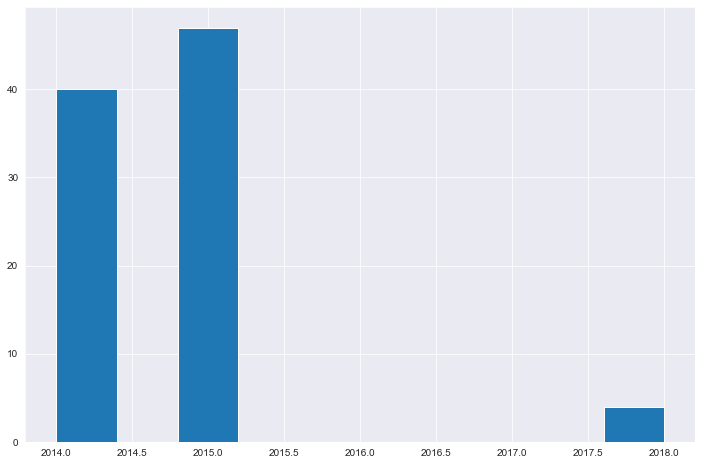

In [6]:
datetime = pd.to_datetime(accident_data['Acc_datetime'].values)
plt.figure(figsize=(12,8))
plt.tight_layout
plt.hist(datetime.year)

More accicent occure in the year 2015. Less accident happen in the year 2017 to 2018

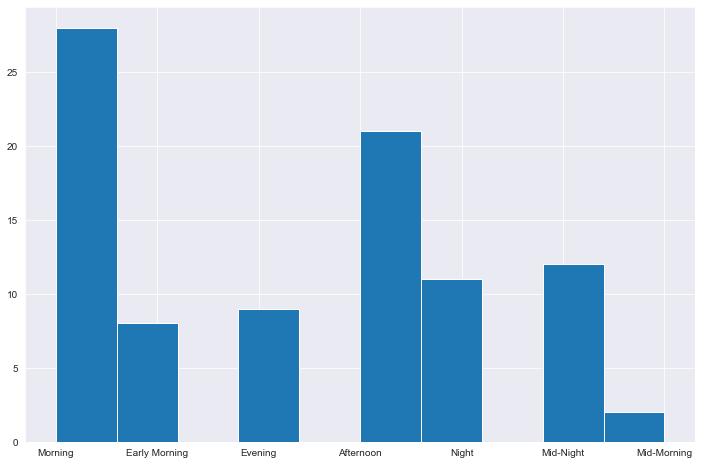

In [7]:
def day_time_labeler(timeVal):
    if timeVal <= 4:
        return 'Mid-Night'
    elif timeVal > 4 and timeVal <= 6:
        return 'Early Morning'
    elif timeVal > 6 and timeVal <= 9:
        return 'Morning'
    elif timeVal > 9 and timeVal <= 12:
        return 'Mid-Morning'
    elif timeVal > 12 and timeVal <= 16:
        return 'Afternoon'
    elif timeVal > 16 and timeVal <= 20:
        return 'Evening'
    elif timeVal > 20 and timeVal <= 23:
        return 'Night'

# Acc_daytime column added by specifying a hour threshold
accident_data['Acc_daytime'] = datetime.hour
accident_data['Acc_daytime'] = accident_data['Acc_daytime'].apply(lambda x: day_time_labeler(x))
plt.figure(figsize=(12,8))
plt.tight_layout
accident_data['Acc_daytime'].hist()

Most of the accidents occure between 8:00 AM and 9:00 AM in the morning. But Acc_daytime is a categorical column so we need convert it into numerical column.

In [8]:
le_daytime = LabelEncoder()
accident_data['Acc_daytime'] = le_daytime.fit_transform(accident_data['Acc_daytime'].values)

<a id='acc_location'></a>
### 2.2 Accident Location

In [9]:
# This function extract speed factor from the AccLocation Column
def speed_extractor(StrText):
    result = 0.000
    try:
        if len(StrText) > 0:
            val = re.findall('\d{1,15}.\d{1,3}', StrText)
            result = float(val[0]) if len(val) > 0 else 0
    except ValueError:
        result = 0.000
    return result

accident_data['AccLocation_temp'] = accident_data['AccLocation'].fillna('Unknown')
# Replace all + with .
accident_data['AccLocation_temp'].replace('\+', '.', regex=True, inplace=True)
accident_data['Acc_speed'] = accident_data['AccLocation_temp'].apply(lambda x: speed_extractor(x))
accident_data.drop(['AccLocation_temp'], axis=1, inplace=True)
accident_data['Acc_speed'].values

array([ 69.5  ,  72.5  ,  20.25 ,   0.   , 126.8  , 126.8  , 126.8  ,
       160.11 , 115.6  , 115.6  ,  84.3  ,  26.2  , 172.2  ,  18.7  ,
        80.   , 162.8  , 162.8  ,  96.1  ,  91.8  , 135.025,  60.2  ,
       164.85 ,  14.835,  27.8  ,  92.   , 126.8  , 126.8  ,  24.65 ,
         0.   , 117.5  , 109.   , 109.   , 109.   ,  16.7  ,  24.675,
        19.35 ,   0.   ,   0.   , 149.2  , 180.9  , 173.2  , 131.6  ,
       132.6  , 122.05 , 117.   ,   0.   , 157.8  , 128.   ,  90.25 ,
       157.4  ,  20.7  ,  91.8  , 162.8  , 138.25 , 138.25 , 121.7  ,
        18.8  ,  23.   ,  18.8  , 132.7  , 104.5  , 148.2  ,  18.7  ,
       126.9  ,  89.5  , 125.   ,  17.15 ,  14.55 ,  86.   ,  86.   ,
       164.2  ,  85.4  ,  13.5  , 162.05 , 147.7  , 147.7  , 122.1  ,
       153.9  , 112.6  , 142.3  ,  86.   ,  26.   ,  24.75 ,  24.1  ,
        86.   , 133.   ,  21.8  , 150.   , 148.9  ,  12.5  ,  24.5  ])

In [10]:
locCounter = Counter(accident_data['AccLocation'].values)
print("Most Accident pron areas are:")
for loc in locCounter.most_common(2):
    print("\n%s"%loc[0])

Most Accident pron areas are:

126.800 KM RHS

109.000 KM RHS


<a id='acc_causes'></a>
### 2.3 Accident Cause

In [11]:
accident_data['Causes'].unique()

array(['2', '3', '1', '4', '5', '-', '7'], dtype=object)

As we can see there are some missig data present so we can replace the value of that with 6

In [12]:
accident_data['Causes'] = accident_data['Causes'].apply(lambda x: int(x) if str.isnumeric(x) else 6)
accident_data['Causes'].unique()

array([2, 3, 1, 4, 5, 6, 7], dtype=int64)

<a id='acc_help'></a>
### 2.4 Help Provided By Ambulance Patrol

In [13]:
accident_data['HelpProvidedByAmbulancePatrol'].unique()

array(['Petrol Vehicle', 'Ambulance', 'Ambulance/Petrol Vehicle'],
      dtype=object)

In [14]:
# We need to convert this categorical columns to numerical column so that we can easily train our algorithm
le = LabelEncoder()
accident_data['HelpProvidedByAmbulancePatrol'] = le.fit_transform(accident_data['HelpProvidedByAmbulancePatrol'].values)
accident_data['HelpProvidedByAmbulancePatrol'].values

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2,
       2, 1, 1])

<a id='acc_classification'></a>
### 2.5 Classification of Accident

In [15]:
accident_data['ClassificationOfAccident'].unique()

array(['2', '1', '-', '3', '4'], dtype=object)

We sholud replace the '-' value with some numerical value I'm replacing it with 5

In [16]:
accident_data['ClassificationOfAccident'] = accident_data['ClassificationOfAccident'].apply(lambda x: int(x) if str.isnumeric(x) else 5)

<a id='col_rearange'></a>
### 2.6 Rearanging Columns 

In [17]:
cols = ['Acc_datetime', 'NatureAccident', 'Causes', 'RoadFeature', 'RoadCondition','IntersectionTypeControl', 
        'WeatherCondition', 'Fatal', 'Grevious', 'Minor', 'Injured', 'NumAnimalsKilled','HelpProvidedByAmbulancePatrol', 
        'Acc_daytime', 'Acc_speed', 'AccLocation', 'Remarks','VehicleResponsible','ClassificationOfAccident']
accident_data = accident_data[cols]
accident_data.head()

,Acc_datetime,NatureAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Acc_daytime,Acc_speed,AccLocation,Remarks,VehicleResponsible,ClassificationOfAccident
0,9/6/2015 09:00 AM,2,2,2,1,9,1,0,2,1,0,0,2,5,69.50,Ch. 69+5006,NaN,One Diesel Truck collapsed,2
1,9/5/2014 07:18 AM,7,2,2,3,9,1,2,0,0,0,0,0,5,72.50,72+500,NaN,Lorry & Scorpio,1
2,9/10/2014 08:50 AM,4,3,3,1,9,1,0,0,0,0,0,2,5,20.25,20+250 LHS,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),5
3,8/9/2015 05:00 AM,1,2,1,3,9,1,0,1,1,0,0,2,1,0.00,NaN,NaN,Lorry Truck,2
4,8/4/2015 08:23 AM,2,2,4,4,9,1,0,2,1,1,0,2,5,126.80,126.800 KM RHS,A car upside due to over speed,Car,2


<a id='featue_selection'></a>
## 3. Feature Selection And Splitting

We need to select the feature matrix only of 2014 year accident data and predict the accident classification on 2015 year accident data.

In [18]:
acc_datetime = pd.to_datetime(accident_data['Acc_datetime'].values)
## Feature Matrix
X = accident_data.iloc[acc_datetime.year == 2014, 1:15].values

## Target Vector
y = accident_data.iloc[acc_datetime.year == 2014, -1].values

## Split the accident data 2014 as train data and 2015 as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

<a id='important_feature'></a>
## 4. Finding Important Features

 1) Acc_speed                      0.150847
 2) Fatal                          0.149046
 3) NatureAccident                 0.128434
 4) Causes                         0.117572
 5) Minor                          0.114137
 6) Acc_daytime                    0.096637
 7) Grevious                       0.095784
 8) HelpProvidedByAmbulancePatrol  0.052499
 9) IntersectionTypeControl        0.029966
10) RoadFeature                    0.028833
11) RoadCondition                  0.018341
12) NumAnimalsKilled               0.017905
13) Injured                        0.000000
14) WeatherCondition               0.000000


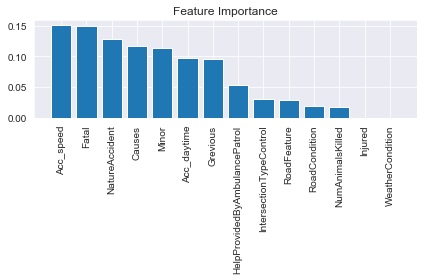

In [19]:
## Standarize the dataset
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

feat_labels = accident_data.columns[1:15]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"% (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

So Top Five Accident Features Are Acc_speed, Fatal, NatureAccident, Causes and Minor

<a id='model_selection'></a>
## 5. Selecting And Applying Model

In [57]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski'))

pipe_svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=1, gamma=0.1, C=1.0))

In [58]:
pipe_knn.fit(X_train, y_train)
print("Test Accuracy For KNN Classifier: %.3f"% pipe_knn.score(X_test, y_test))

Test Accuracy For KNN Classifier: 0.833


In [59]:
pipe_svm.fit(X_train, y_train)
print("Test Accuracy for SVM Classfier: %.3f"% pipe_svm.score(X_test, y_test))

Test Accuracy for SVM Classfier: 0.750


As we can see with KNN classfier we are getting better Test Accuracy but We don't know how KNN classfier will behave on unseen test data.. For that We need to tune the hyperparameter and need to see the generalization performization of this two models.

<a id='model_evaluation'></a>
## 6. Model Evaluation And Performance Tuning

In [56]:
## We need to do cross validation so that we can see generilization performance
scores_knn = cross_val_score(estimator=pipe_knn, X=X_train, y=y_train, cv=8, n_jobs=1)
scores_svm = cross_val_score(estimator=pipe_svm, X=X_train, y=y_train, cv=8, n_jobs=1)
print("CV Accuracy Scores for KNN: %.3f +/- %.3f"% (np.mean(scores_knn), np.std(scores_knn)))
print("CV Accuracy Scores for SVM:  %.3f +/- %.3f"% (np.mean(scores_svm), np.std(scores_svm)))

CV Accuracy Scores for KNN: 0.733 +/- 0.226
CV Accuracy Scores for SVM:  0.583 +/- 0.297


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


Still, I'm not sure Who is better. Still may be SVM can do with correct hyperparameter tuning

<a id='accuracy_svm'></a>
### 6.1 Cross Validation for SVM

In [42]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000]
param_grid = [
    {
        'svc__C': param_range,
        'svc__gamma': param_range,
        'svc__kernel': ['rbf']
    }]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=8, n_jobs=-1)
gs.fit(X_train, y_train)
print("Best Score:%.3f"%gs.best_score_)
print("Best Params:\n", gs.best_params_)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


Best Score:0.607
Best Params:
 {'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<a id='accuracy_knn'></a>
### 6.2 Cross Validation for KNN

In [49]:
param_range = [1,2,3,4,5]
param_grid = [
    {
        'n_neighbors': param_range,
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }]
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)
print("Best Score:%.3f"%gs.best_score_)
print("Best Params:\n", gs.best_params_)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best Score:0.464
Best Params:
 {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


So As we can see svm may do better on generalization performance

<a id='final_model'></a>
## 7. Applying Final Model

In [73]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf',gamma=0.01, C=10.0,random_state=1))
clf.fit(X, y)
## Feature Matrix
X_2015 = accident_data.iloc[acc_datetime.year == 2015, 1:15].values

## Target Vector
y_2015 = accident_data.iloc[acc_datetime.year == 2015, -1].values

In [74]:
y_2015_pred = clf.predict(X_2015)

In [75]:
print("Missclassified samples: %d" %(y_2015 != y_2015_pred).sum())
print("Accuracy: %.3f"% clf.score(X_2015, y_2015))

Missclassified samples: 27
Accuracy: 0.426
